# Getting data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import vnquant.data as dt

stocks = ["TPB", "MBB", "ACB"]
color_dict = {"TPB": "purple", "MBB": "blue", "ACB": "green"}

loader = dt.DataLoader(
    symbols=stocks,
    start="2020-01-01",
    end="2024-12-31",
    minimal=True,
    data_source="cafe",
)

data = loader.download()
data = data.stack()
data = data.reset_index()
data["date"] = pd.to_datetime(data["date"], format="%Y/%m/%d")
data.sort_values(by="date", ascending=True, inplace=True)
# this is a secret tool that will help us later
data["close_pct_change"] = data.groupby("code")["close"].pct_change()
print(data.tail())

[2024-12-12 02:25:21] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['TPB', 'MBB', 'ACB'] from CAFEF, start: 01/01/2020, end: 31/12/2024!
[2024-12-12 02:25:21] - Assitant - INFO      - download_one - line 94 - data TPB from 2020-01-01 to 2024-12-31 have already cloned!
[2024-12-12 02:25:22] - Assitant - INFO      - download_one - line 94 - data MBB from 2020-01-01 to 2024-12-31 have already cloned!
[2024-12-12 02:25:22] - Assitant - INFO      - download_one - line 94 - data ACB from 2020-01-01 to 2024-12-31 have already cloned!


Attributes       date Symbols code  high    low   open  close  adjust  \
4          2024-12-10     MBB  MBB  24.5  24.25  24.40  24.25   24.25   
3          2024-12-10     ACB  ACB  25.5  25.35  25.50  25.35   25.35   
2          2024-12-11     TPB  TPB  16.5  16.20  16.40  16.30   16.30   
1          2024-12-11     MBB  MBB  24.4  24.10  24.25  24.30   24.30   
0          2024-12-11     ACB  ACB  25.5  25.20  25.35  25.40   25.40   

Attributes  volume_match   value_match  close_pct_change  
4              5009700.0  1.218910e+11         -0.006148  
3              3399100.0  8.641500e+10         -0.005882  
2              6312900.0  1.031210e+11         -0.003058  
1              5623000.0  1.363840e+11          0.002062  
0              8827300.0  2.240750e+11          0.001972  


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3702 entries, 3701 to 0
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3702 non-null   datetime64[ns]
 1   Symbols           3702 non-null   object        
 2   code              3702 non-null   object        
 3   high              3702 non-null   float64       
 4   low               3702 non-null   float64       
 5   open              3702 non-null   float64       
 6   close             3702 non-null   float64       
 7   adjust            3702 non-null   float64       
 8   volume_match      3702 non-null   float64       
 9   value_match       3702 non-null   float64       
 10  close_pct_change  3699 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 347.1+ KB


# Pivot for wide format

In [3]:
wide_data = data.pivot(
    columns="code",
    values=[
        "high",
        "low",
        "open",
        "close",
        "adjust",
        "volume_match",
        "value_match",
        "close_pct_change",
    ],
    index="date",
)

# Reset column names for easier access
wide_data.columns.name = None
print(wide_data.tail())

             high                  low                 open                \
code          ACB    MBB    TPB    ACB    MBB    TPB    ACB    MBB    TPB   
date                                                                        
2024-12-05  25.70  24.60  16.45  24.95  23.80  15.75  25.00  23.85  15.85   
2024-12-06  25.75  24.60  16.50  25.50  24.35  16.25  25.50  24.60  16.50   
2024-12-09  25.65  24.55  16.50  25.35  24.25  16.25  25.60  24.40  16.35   
2024-12-10  25.50  24.50  16.50  25.35  24.25  16.35  25.50  24.40  16.40   
2024-12-11  25.50  24.40  16.50  25.20  24.10  16.20  25.35  24.25  16.40   

            close  ... adjust volume_match                          \
code          ACB  ...    TPB          ACB         MBB         TPB   
date               ...                                               
2024-12-05  25.70  ...  16.45    8267100.0  10559800.0  11737500.0   
2024-12-06  25.65  ...  16.25    6049500.0   6119000.0   9727100.0   
2024-12-09  25.50  ...  16.40    

# Visualize Stock Prices
Here, I am choosing the closing price of the stock

In [4]:
wide_close_data = wide_data[['close','close_pct_change']]
wide_close_data.tail()

close               close_pct_change                    
code          ACB    MBB    TPB              ACB       MBB       TPB
date                                                                
2024-12-05  25.70  24.55  16.45         0.025948  0.029350  0.041139
2024-12-06  25.65  24.35  16.25        -0.001946 -0.008147 -0.012158
2024-12-09  25.50  24.40  16.40        -0.005848  0.002053  0.009231
2024-12-10  25.35  24.25  16.35        -0.005882 -0.006148 -0.003049
2024-12-11  25.40  24.30  16.30         0.001972  0.002062 -0.003058

Index(['ACB', 'MBB', 'TPB'], dtype='object', name='code')


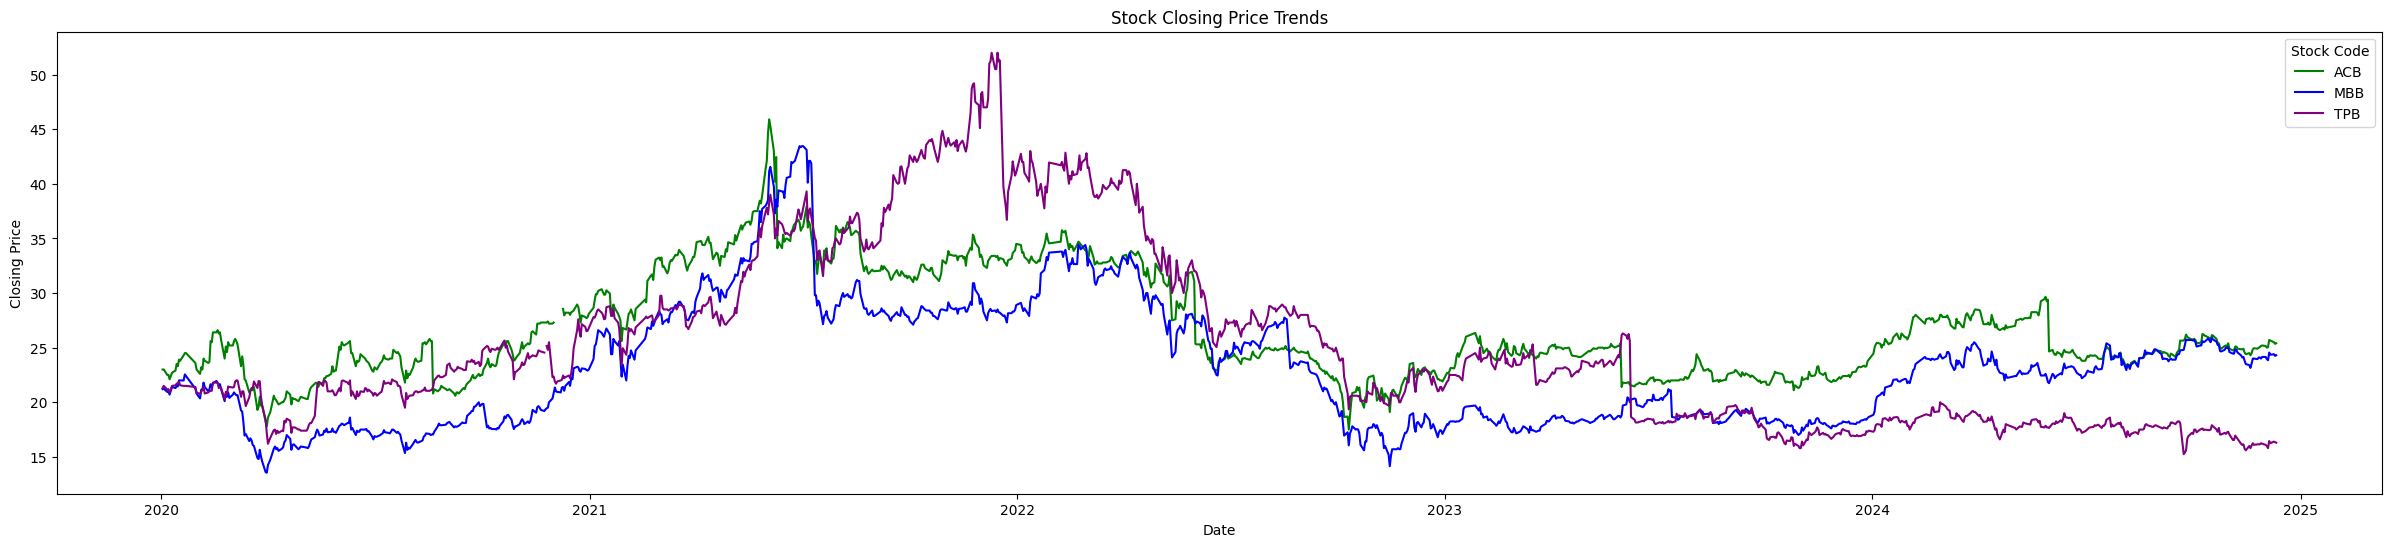

In [5]:
print(wide_close_data["close"].columns)
print("=======================================================")

# Plot each stock
plt.figure(figsize=(30, 6))
for stock in wide_close_data["close"].columns:
    plt.plot(
        wide_close_data.index,
        wide_close_data["close"][stock],
        label=stock,
        color=color_dict[stock],
    )

plt.title("Stock Closing Price Trends")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(title="Stock Code")
plt.show()

Use Seaborn for grouped plotting

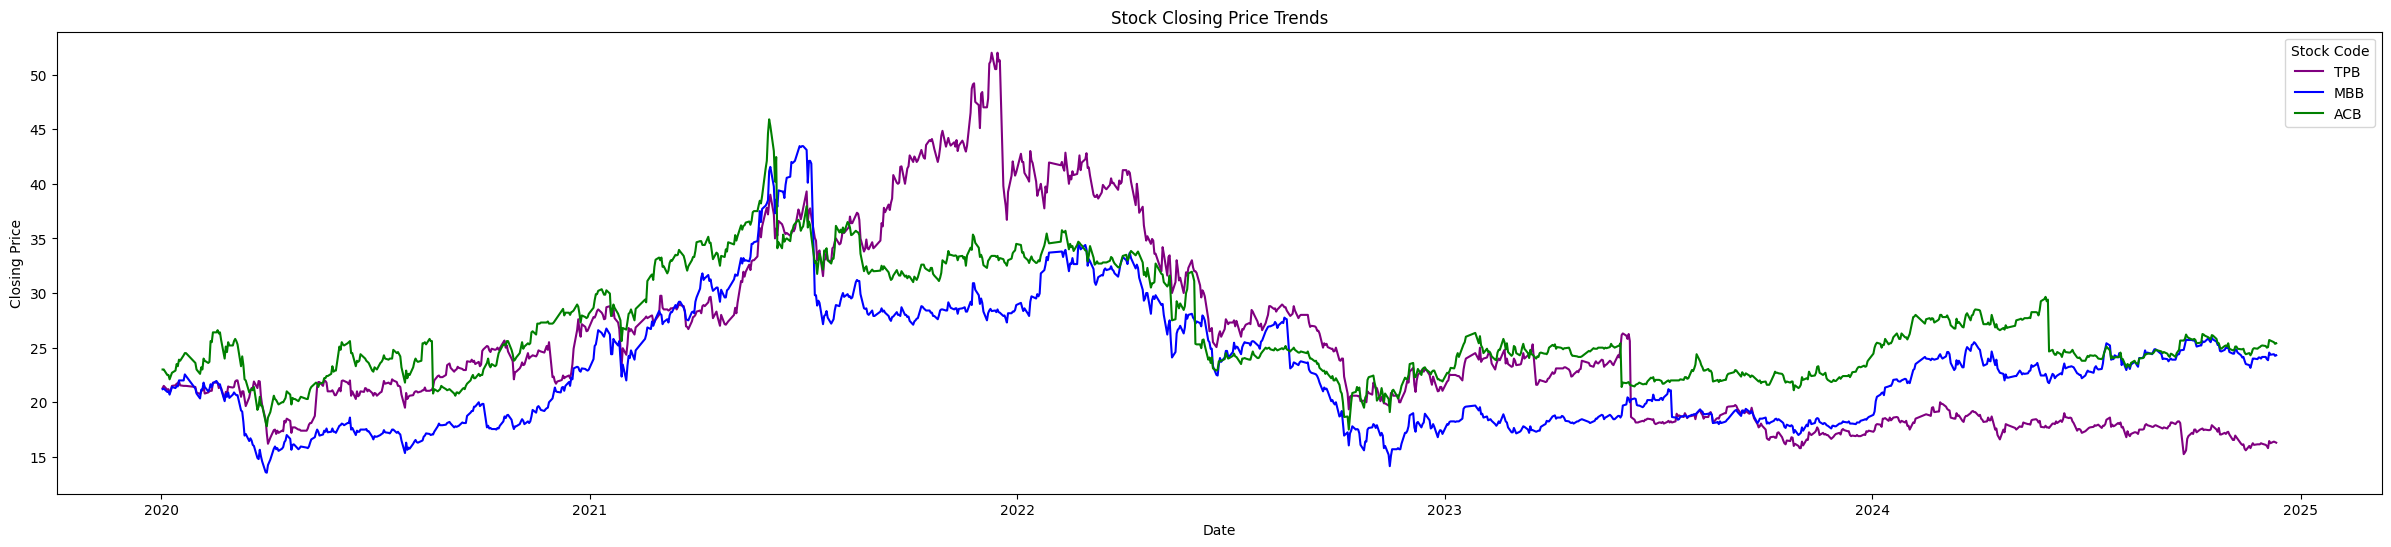

In [6]:
plt.figure(figsize=(30, 6))
sns.lineplot(data=data, x='date', y='close', hue='code', palette=color_dict)

plt.title('Stock Closing Price Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Stock Code')
plt.show()

# The change in stock closing price over time

In [7]:
print(wide_close_data.tail(10))

            close               close_pct_change                    
code          ACB    MBB    TPB              ACB       MBB       TPB
date                                                                
2024-11-28  25.15  24.00  16.25         0.003992 -0.004149  0.006192
2024-11-29  25.20  24.15  16.20         0.001988  0.006250 -0.003077
2024-12-02  25.15  24.15  16.10        -0.001984  0.000000 -0.006173
2024-12-03  25.00  23.95  16.00        -0.005964 -0.008282 -0.006211
2024-12-04  25.05  23.85  15.80         0.002000 -0.004175 -0.012500
2024-12-05  25.70  24.55  16.45         0.025948  0.029350  0.041139
2024-12-06  25.65  24.35  16.25        -0.001946 -0.008147 -0.012158
2024-12-09  25.50  24.40  16.40        -0.005848  0.002053  0.009231
2024-12-10  25.35  24.25  16.35        -0.005882 -0.006148 -0.003049
2024-12-11  25.40  24.30  16.30         0.001972  0.002062 -0.003058


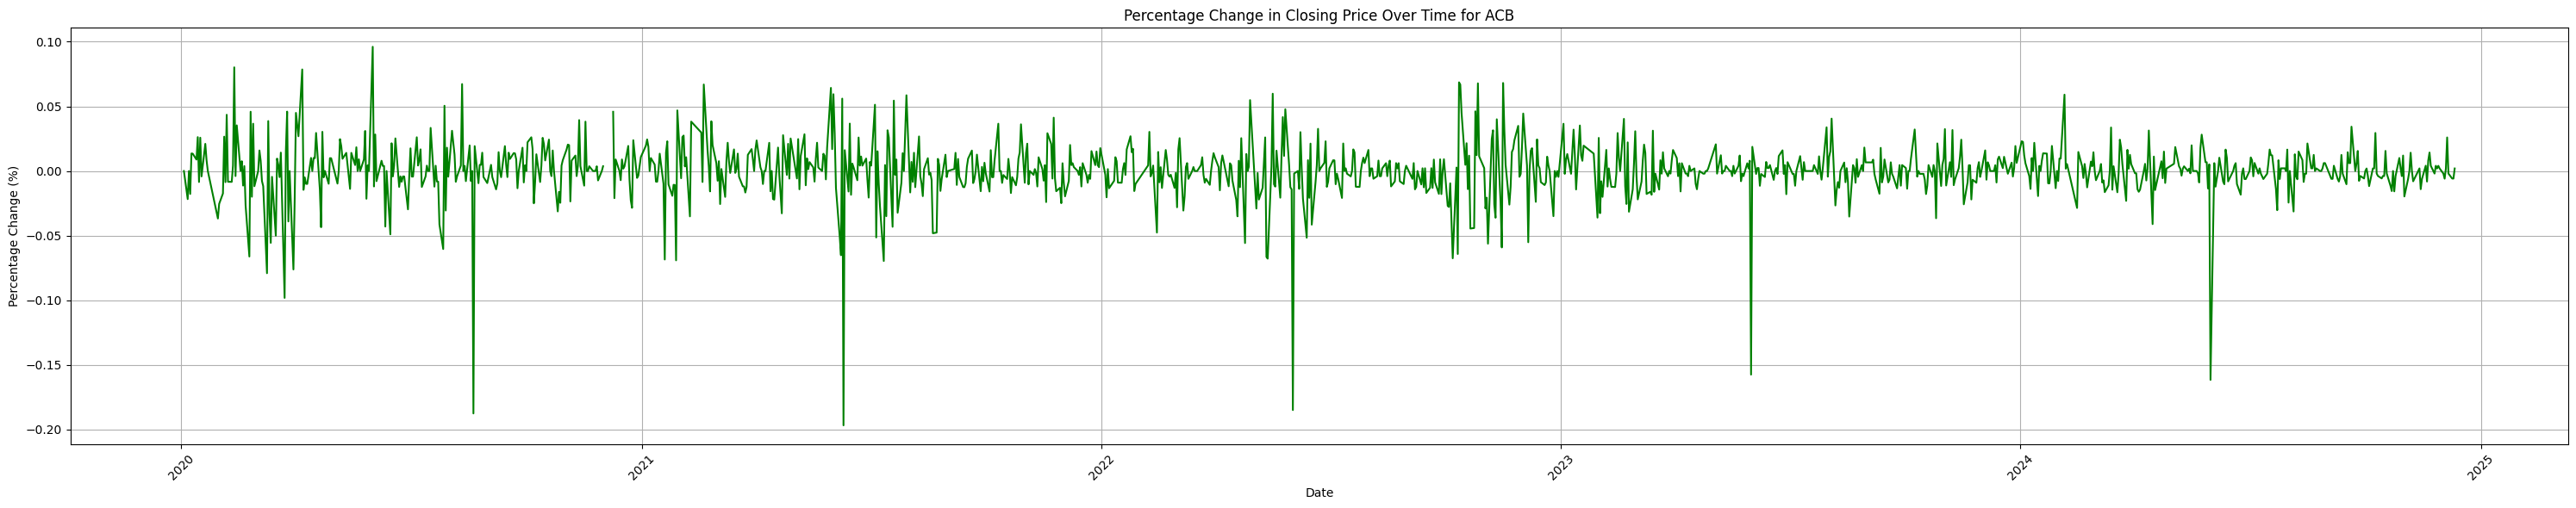

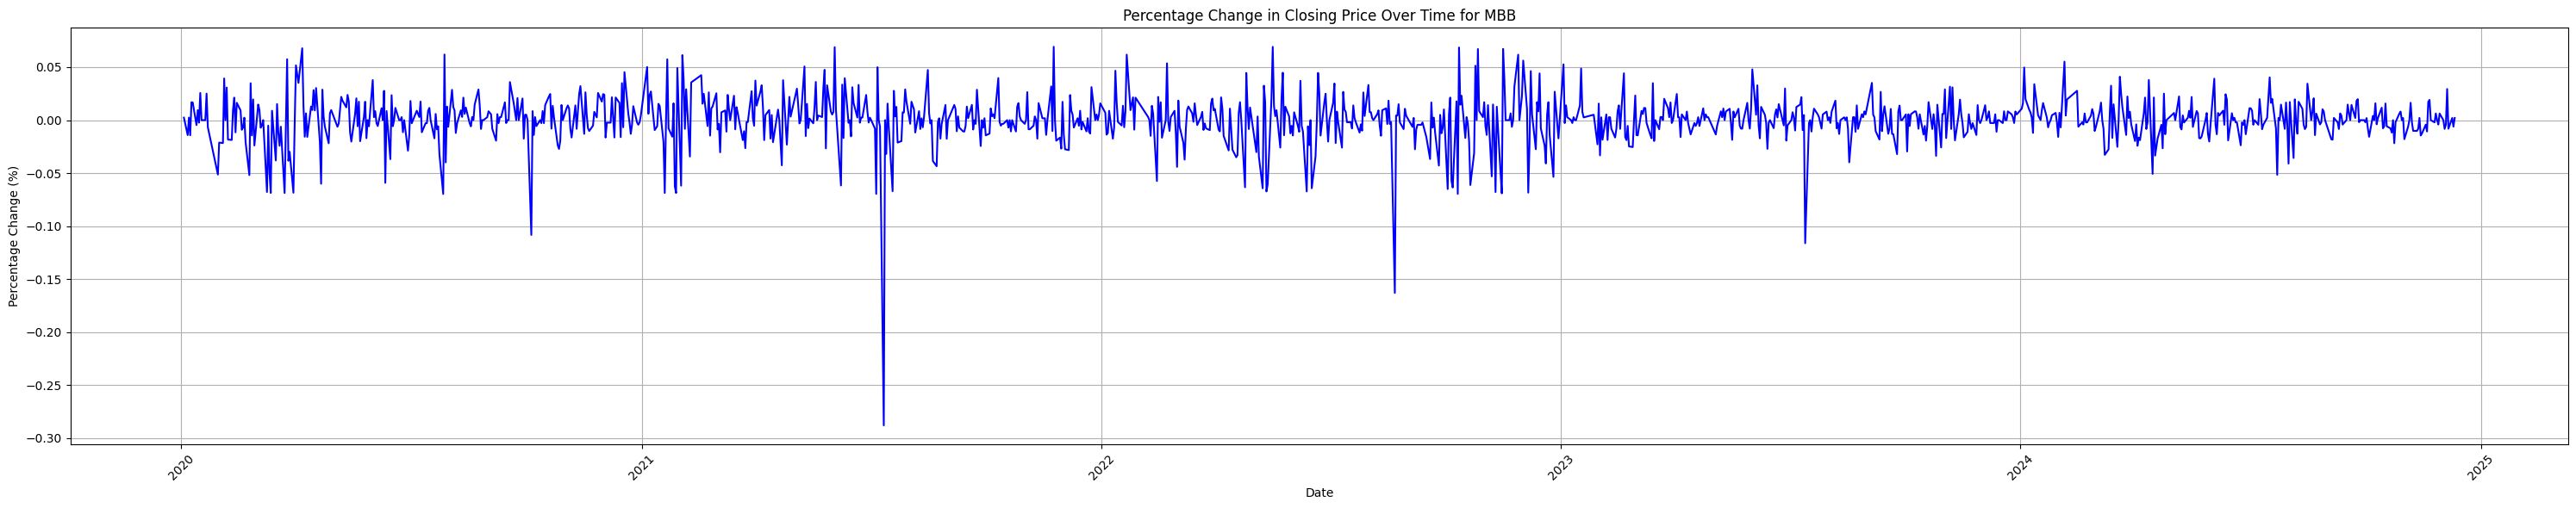

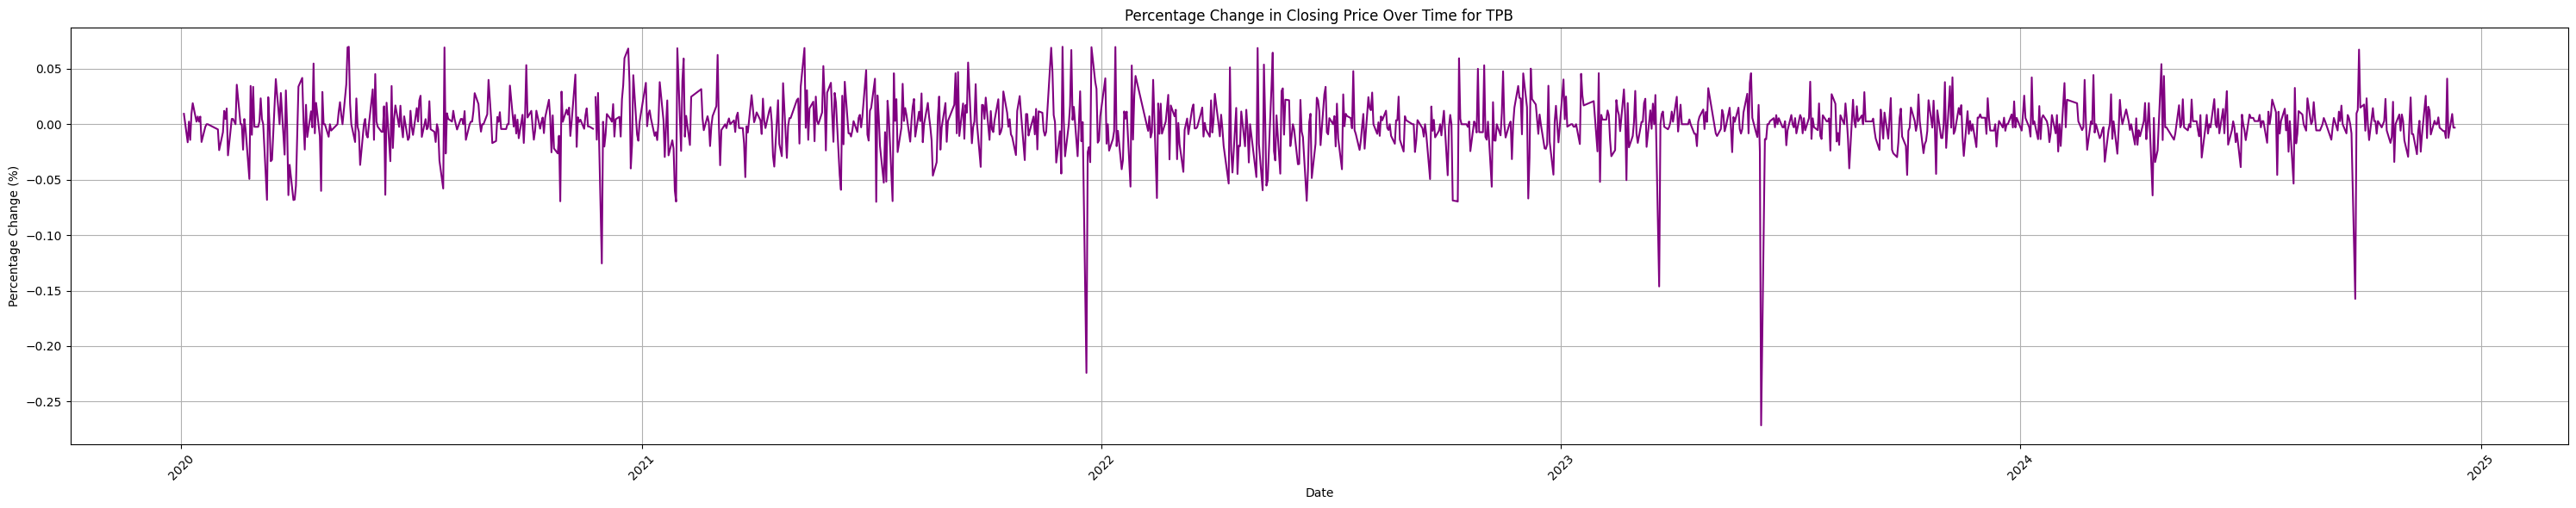

In [8]:
for stock in wide_close_data["close_pct_change"].columns:
    plt.figure(figsize=(30, 6))
    plt.plot(
        wide_close_data.index,
        wide_close_data["close_pct_change"][stock],
        color=color_dict[stock],
    )
    plt.title(f"Percentage Change in Closing Price Over Time for {stock}")
    plt.xlabel("Date")
    plt.ylabel("Percentage Change (%)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# The average daily return for closing price of each stock

In [9]:
for stock in wide_close_data["close_pct_change"].columns:
    avg_return = wide_close_data["close_pct_change"][stock].mean()
    print(f"Average Daily Return of Closing Price for {stock}: {avg_return* 100:3f}%")

Average Daily Return of Closing Price for ACB: 0.033255%
Average Daily Return of Closing Price for MBB: 0.038357%
Average Daily Return of Closing Price for TPB: 0.010842%


# The moving averages of the stocks over different time windows

In [10]:
moving_averages = [10, 20, 30]

for ma in moving_averages:
    column_name = f"MA_{ma}_days"
    for stock in stocks:
        wide_close_data.loc[:, (column_name, stock)] = (
            wide_close_data["close"][stock].rolling(window=ma, center=False).mean()
        )

wide_close_data.head(35)

C:\Users\ngovi\AppData\Local\Temp\ipykernel_24116\1569217274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_close_data.loc[:, (column_name, stock)] = (
C:\Users\ngovi\AppData\Local\Temp\ipykernel_24116\1569217274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_close_data.loc[:, (column_name, stock)] = (
C:\Users\ngovi\AppData\Local\Temp\ipykernel_24116\1569217274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

close               close_pct_change                      \
code         ACB    MBB    TPB              ACB       MBB       TPB   
date                                                                  
2020-01-02  23.0  21.20  21.30              NaN       NaN       NaN   
2020-01-03  23.0  21.25  21.50         0.000000  0.002358  0.009390   
2020-01-06  22.5  20.95  21.15        -0.021739 -0.014118 -0.016279   
2020-01-07  22.5  21.00  21.20         0.000000  0.002387  0.002364   
2020-01-08  22.1  20.70  20.90        -0.017778 -0.014286 -0.014151   
2020-01-09  22.4  21.05  21.10         0.013575  0.016908  0.009569   
2020-01-10  22.7  21.40  21.50         0.013393  0.016627  0.018957   
2020-01-13  22.9  21.30  21.55         0.008811 -0.004673  0.002326   
2020-01-14  23.5  21.50  21.70         0.026201  0.009390  0.006961   
2020-01-15  23.3  21.45  21.75        -0.008511 -0.002326  0.002304   
2020-01-16  23.9  22.00  21.90         0.025751  0.025641  0.006897   
2020-01-17  23.8  22.00  21.55        -0.004184  0.000000 -0.015982   
2020-01-20  24.3  22.00  21.50         0.021008  0.000000 -0.002320   
2020-01-21  24.5  22.55  21.50         0.008230  0.025000  0.000000   
2020-01-22  24.5  22.40  21.50         0.000000 -0.006652  0.000000   
2020-01-30  23.6  21.25  21.40        -0.036735 -0.051339 -0.004651   
2020-01-31  23.0  20.80  20.90        -0.025424 -0.021176 -0.023364   
2020-02-03  22.6  20.35  20.75        -0.017391 -0.021635 -0.007177   
2020-02-04  23.2  21.15  21.00         0.026549  0.039312  0.012048   
2020-02-05  23.0  21.15  21.10        -0.008621  0.000000  0.004762   
2020-02-06  24.0  21.80  21.40         0.043478  0.030733  0.014218   
2020-02-07  23.8  21.40  20.80        -0.008333 -0.018349 -0.028037   
2020-02-10  23.6  21.00  20.90        -0.008403 -0.018692  0.004808   
2020-02-11  23.7  21.20  21.00         0.004237  0.009524  0.004785   
2020-02-12  25.6  21.65  21.05         0.080169  0.021226  0.002381   
2020-02-13  25.5  21.40  21.05        -0.003906 -0.011547  0.000000   
2020-02-14  26.4  21.75  21.80         0.035294  0.016355  0.035629   
2020-02-17  26.4  21.95  21.80         0.000000  0.009195  0.000000   
2020-02-18  26.6  21.75  21.80         0.007576 -0.009112  0.000000   
2020-02-19  26.3  21.60  21.30        -0.011278 -0.006897 -0.022936   
2020-02-20  26.4  21.65  21.40         0.003802  0.002315  0.004695   
2020-02-21  25.7  21.20  21.30        -0.026515 -0.020785 -0.004673   
2020-02-24  24.0  20.10  20.25        -0.066148 -0.051887 -0.049296   
2020-02-25  25.1  20.80  20.95         0.045833  0.034826  0.034568   
2020-02-26  24.6  20.50  20.75        -0.019920 -0.014423 -0.009547   

           MA_10_days                MA_20_days                  MA_30_days  \
code              TPB     MBB    ACB        TPB      MBB     ACB        TPB   
date                                                                          
2020-01-02        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-03        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-06        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-07        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-08        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-09        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-10        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-13        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-14        NaN     NaN    NaN        NaN      NaN     NaN        NaN   
2020-01-15     21.365  21.180  22.79        NaN      NaN     NaN        NaN   
2020-01-16     21.425  21.260  22.88        NaN      NaN     NaN        NaN   
2020-01-17     21.430  21.335  22.96        NaN      NaN     NaN        NaN   
2020-01-20     21.465  21.440  23.14        NaN      NaN     NaN        NaN   
2020-01-21     21.495  21.595  23.34        NaN 

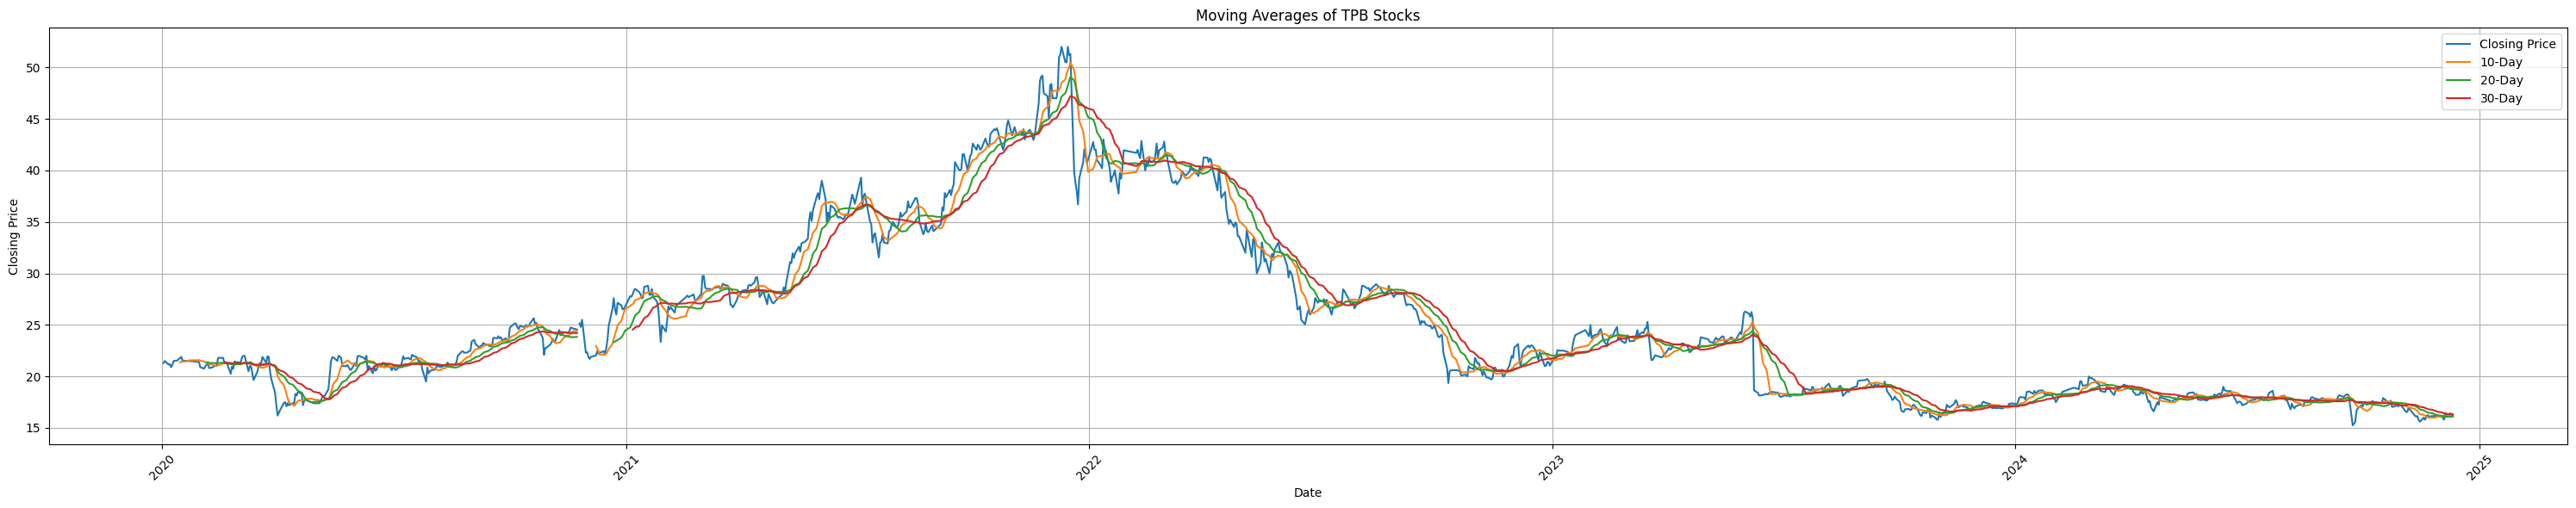

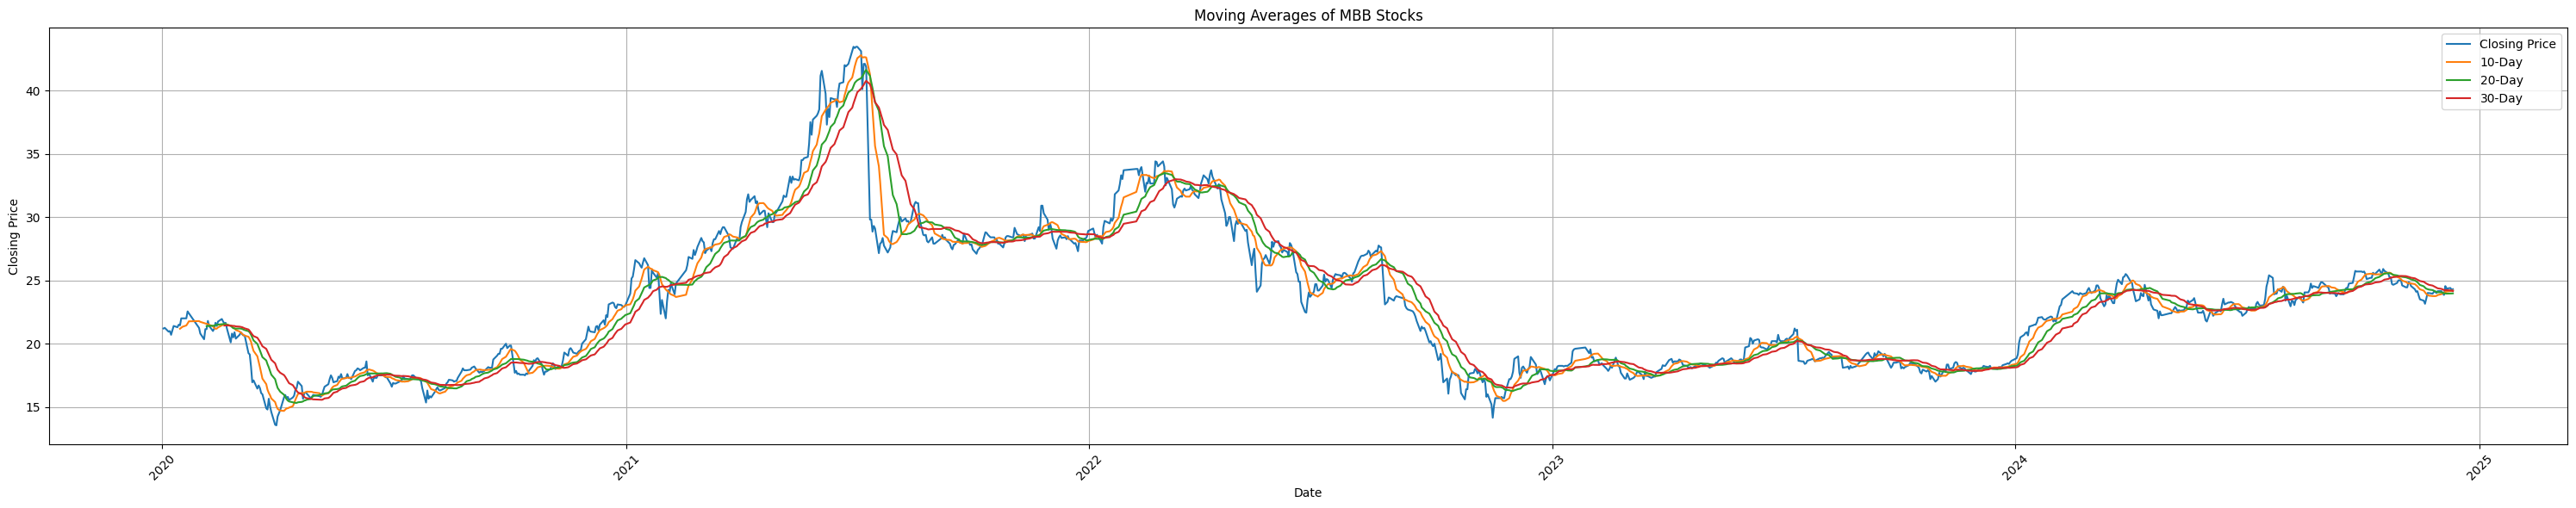

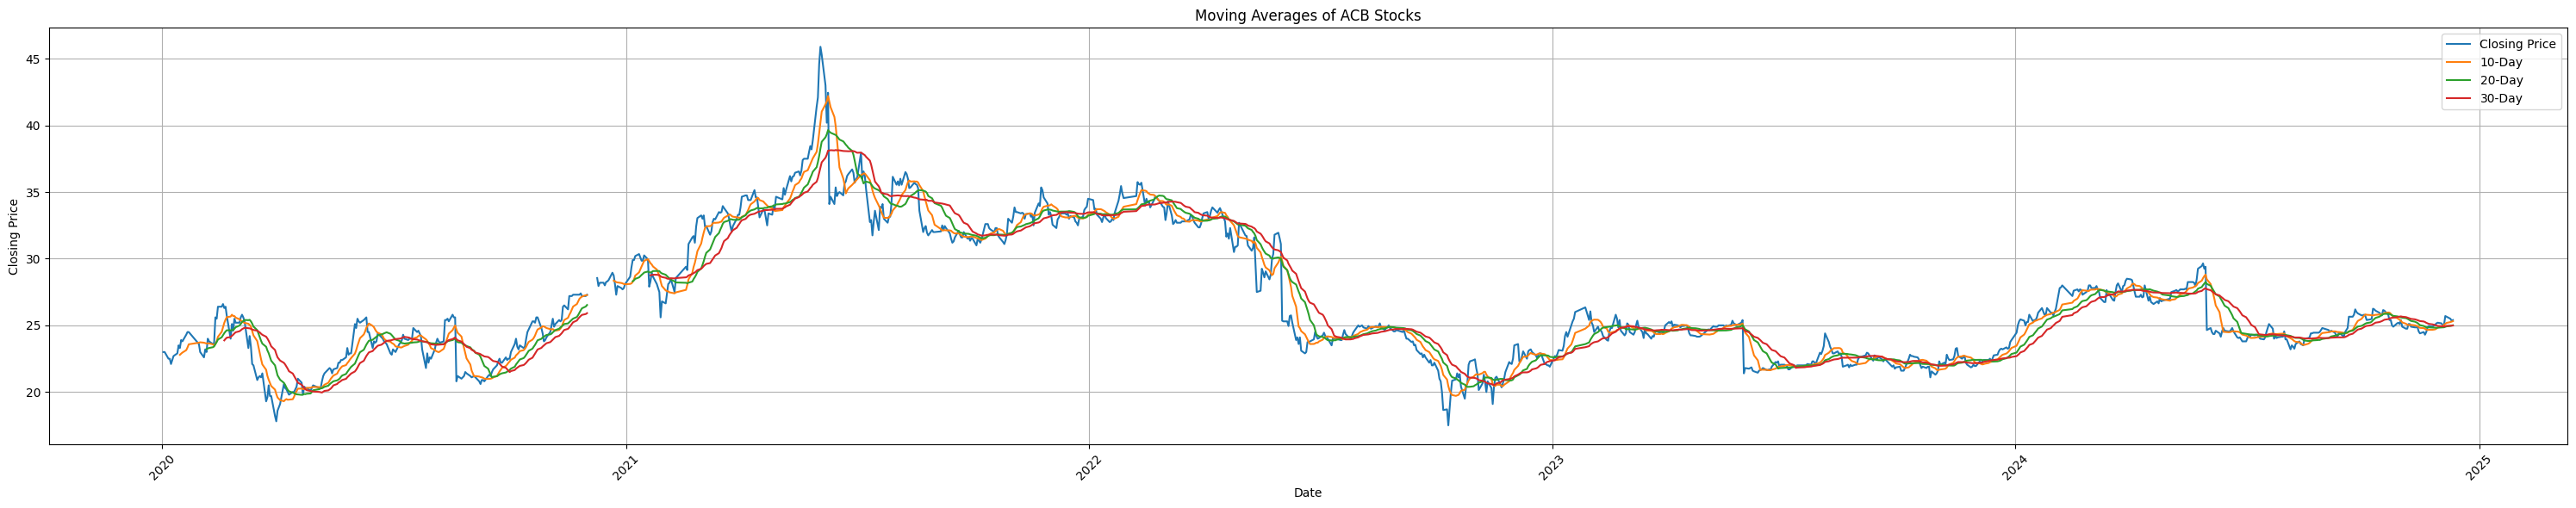

In [11]:
for stock in stocks:
    plt.figure(figsize=(30, 6))
    plt.plot(
        wide_close_data.index,
        wide_close_data["close"][stock],
        label="Closing Price",
    )
    for ma in moving_averages:
        plt.plot(
            wide_close_data.index,
            wide_close_data[f"MA_{ma}_days"][stock],
            label=f"{ma}-Day",
        )

    plt.title(f"Moving Averages of {stock} Stocks")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# The correlation between the daily returns of the closing price of different stocks

Correlation Matrix of Daily Returns:
code       ACB       MBB       TPB
code                              
TPB   0.421714  0.524425  1.000000
MBB   0.599922  1.000000  0.524425
ACB   1.000000  0.599922  0.421714


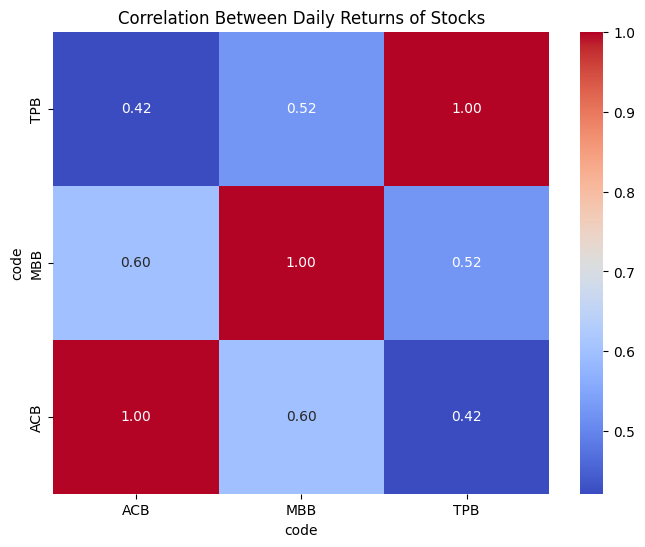

In [12]:

correlation_matrix = wide_close_data['close_pct_change'].dropna().corr()
correlation_matrix.sort_index(inplace=True,ascending=False)
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Correlation Between Daily Returns of Stocks")
plt.show()

# Value is at risk (VaR) when investing in a stock

Let's say we want to invest 10 million into each stock, and each stock will have the same level of confidence of 96%

In [13]:
investment_amount = 10000000
confidence_level = 0.96

There is a few methods to calculate VaR, here I will use Historical Simulation method. Below is the explanation:

  1. Obtain historical returns for the stock.
  2. Sort the returns in ascending order.
  3. Determine the cutoff percentile based on the confidence level (e.g., for 96%, use the 4th percentile).
  4. The VaR is the return at the cutoff percentile multiplied by the investment amount.

In [14]:
for stock in stocks:
    daily_returns = wide_close_data["close_pct_change"][stock]
    # Sort the daily returns in ascending order
    sorted_returns = daily_returns.sort_values(ascending=True).dropna()

    # Determine the cutoff index for the confidence level
    cutoff_index = int((1 - confidence_level) * len(sorted_returns))

    # Extract the return at the cutoff index (VaR return)
    var_return = sorted_returns.iloc[cutoff_index]

    var = var_return * investment_amount
    print(
        f"Historical VaR ({confidence_level*100}% confidence) for {stock}: {var:,.2f}VND"
    )

Historical VaR (96.0% confidence) for TPB: -447,761.19VND
Historical VaR (96.0% confidence) for MBB: -397,877.98VND
Historical VaR (96.0% confidence) for ACB: -349,344.98VND


This means there's 4% chance of losing these amount of money in a single day for each stock

# Predicting future stock behavior
There are a few methods right now to predict the future behaviour of a stock, here I will use `Relative Strength Index`

The Relative Strength Index (RSI) is a popular momentum oscillator used in technical analysis to measure the speed and change of price movements. It ranges from 0 to 100 and helps identify overbought or oversold conditions:

RSI > 70: The stock is considered overbought, potentially signaling a reversal or correction.

RSI < 30: The stock is considered oversold, potentially signaling a reversal upward.

# Formula:

The RSI is calculated using the following steps:
1. Calculate daily price changes (Δ).
2. Separate the positive changes (Gains) and negative changes (Losses).
3. Compute the average gain and average loss over a chosen period (typically 14 days): `RS= Average Gain/Loss`
4. Calculate the RSI: `RSI=100−(100/(1+RS))`
​


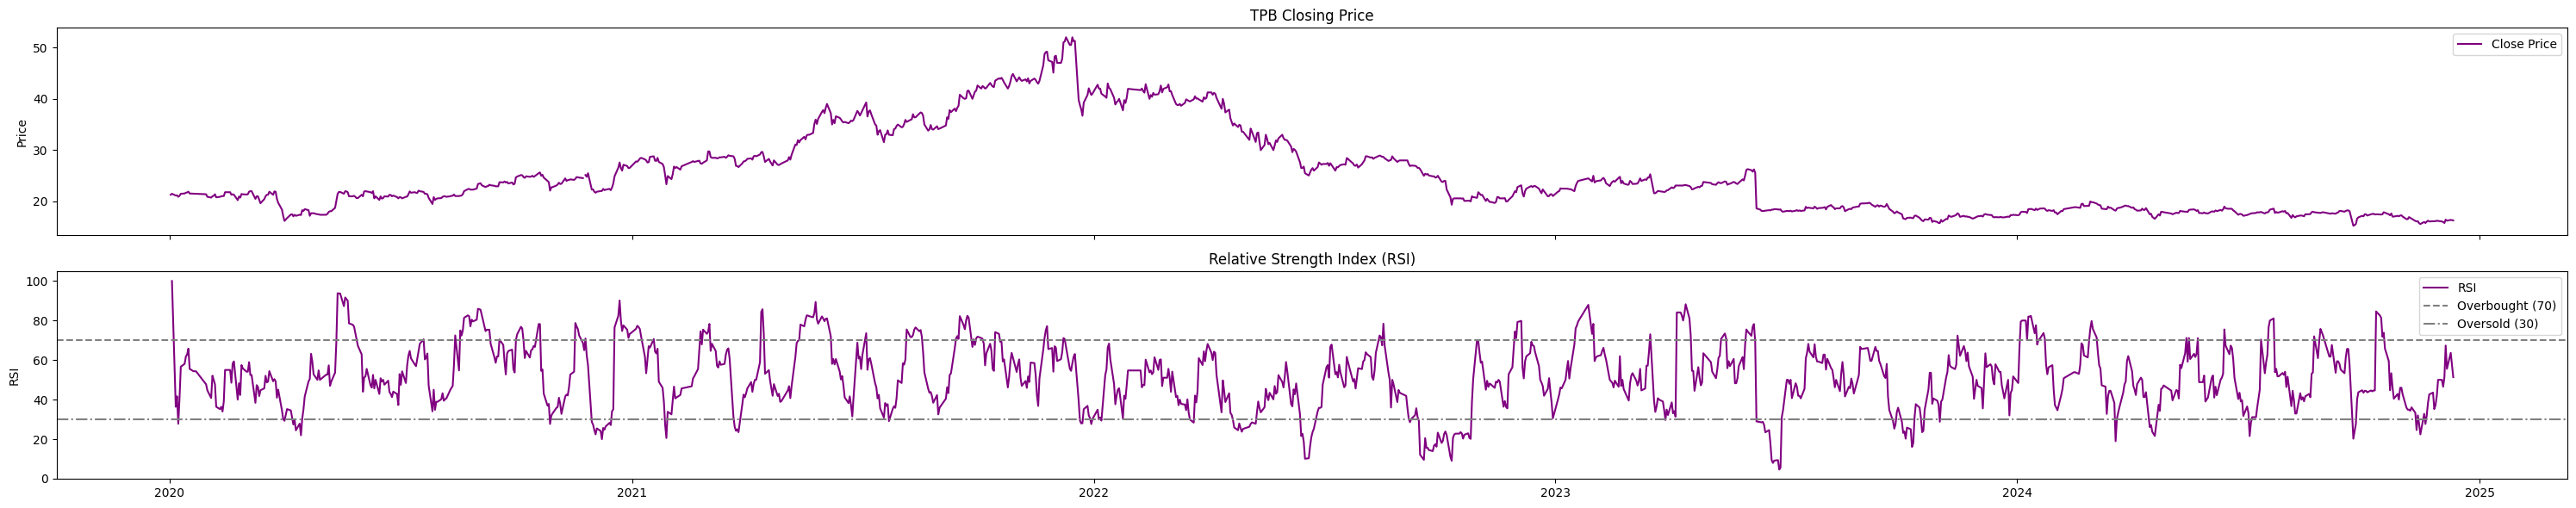

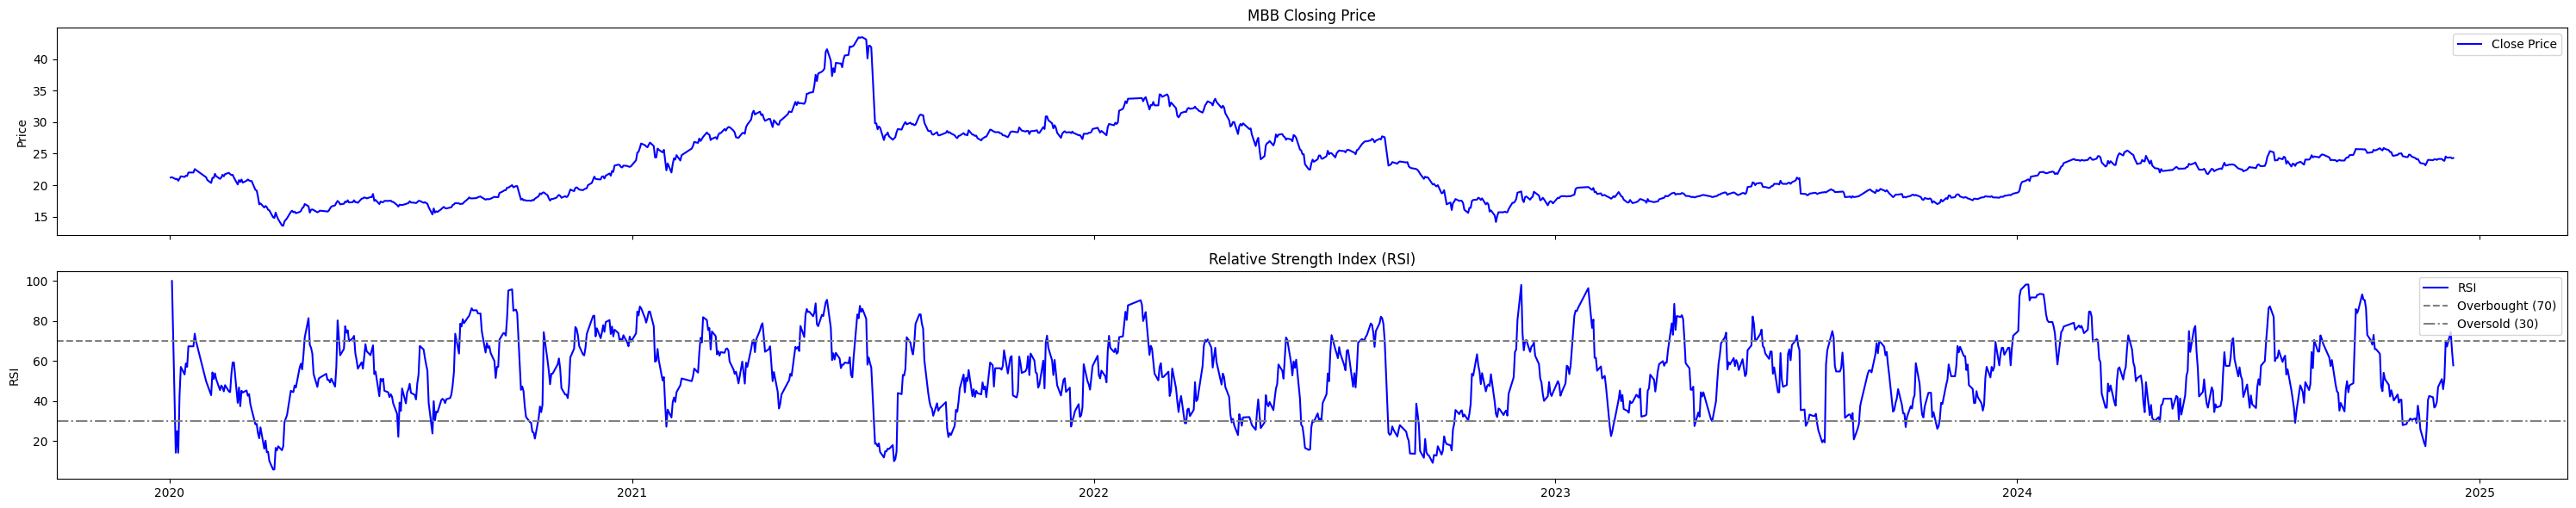

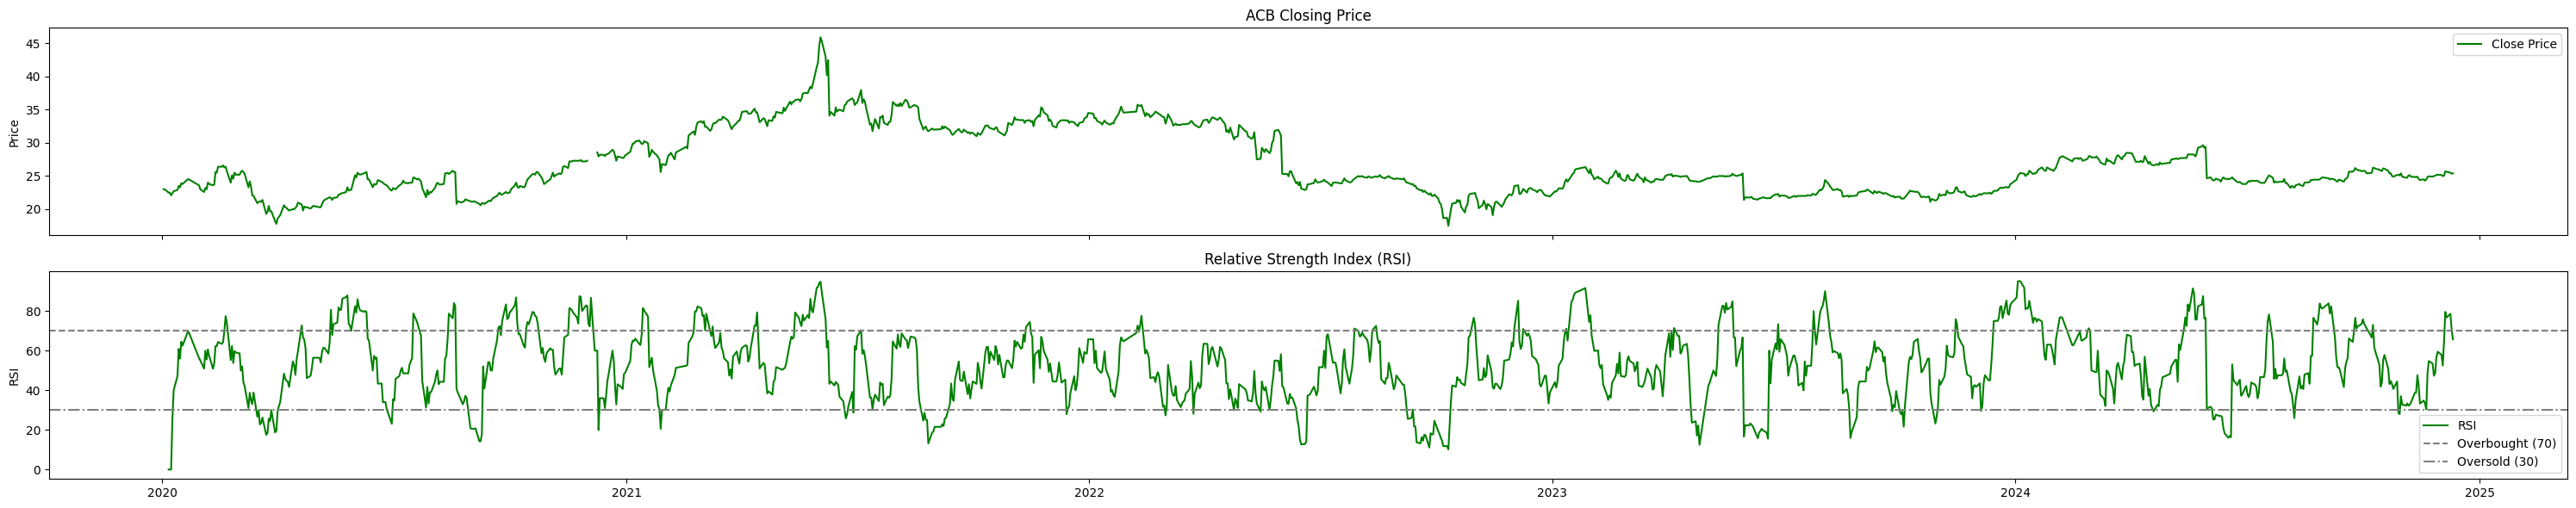

In [50]:
def calculate_rsi(data, window=14):
    delta = data["value"].diff()  # Calculate daily price changes
    gain = delta.where(delta > 0, 0)  # Keep only positive changes
    loss = -delta.where(delta < 0, 0)  # Keep only negative changes (inverted)

    # Calculate rolling averages for gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculate the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))
    return rsi


for stock in stocks:
    stock_data = pd.DataFrame(
        {"date": wide_close_data.index, "value": wide_close_data["close"][stock]}
    )
    stock_data["RSI"] = calculate_rsi(stock_data)
    fig, ax = plt.subplots(2, 1, figsize=(30, 6), sharex=True)

    # Plot stock price
    ax[0].plot(stock_data["value"], label="Close Price", color=color_dict[stock])
    ax[0].set_title(f"{stock} Closing Price")
    ax[0].set_ylabel("Price")
    ax[0].legend()

    # Plot RSI
    ax[1].plot(stock_data["RSI"], label="RSI", color=color_dict[stock])
    ax[1].axhline(70, linestyle="--", color="gray", label="Overbought (70)")
    ax[1].axhline(30, linestyle="-.", color="gray", label="Oversold (30)")
    ax[1].set_title("Relative Strength Index (RSI)")
    ax[1].set_ylabel("RSI")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# How RSI Helps Predicting Stock Future

The **Relative Strength Index (RSI)** helps predict future stock behavior by identifying potential **reversal points** and assessing **momentum strength**.

---

## 1. Identify Overbought and Oversold Conditions
- **Overbought (RSI > 70)**:
  - Indicates the stock may be overvalued.
  - Suggests a potential downward correction or reversal.
  - Traders might consider selling or shorting.

- **Oversold (RSI < 30)**:
  - Indicates the stock may be undervalued.
  - Suggests a potential upward correction or reversal.
  - Traders might consider buying.

### Example:
If a stock's RSI crosses above 30 from an oversold condition, it might indicate the beginning of a bullish trend.

---

## 2. Momentum Divergence
RSI can highlight **price-momentum divergence**, which may signal a trend reversal.

- **Bearish Divergence**:
  - Price makes higher highs, but RSI makes lower highs.
  - Indicates weakening momentum and a potential downtrend.

- **Bullish Divergence**:
  - Price makes lower lows, but RSI makes higher lows.
  - Indicates strengthening momentum and a potential uptrend.

### Example:
If the stock price is falling, but the RSI is rising, it may indicate that the downtrend is losing strength and a rebound could occur.

---

## 3. RSI Crossovers
- **50-Level Crossover**:
  - RSI crossing above 50 signals bullish momentum.
  - RSI crossing below 50 signals bearish momentum.

- **Entry and Exit Points**:
  - Enter a long position when RSI crosses above 30 or 50.
  - Exit or short when RSI crosses below 70 or 50.

---

## 4. Assess Trend Strength
- RSI can indicate whether a trend is strong or losing momentum.
- A consistently high RSI (above 50 but below 70) during an uptrend suggests strength.
- A consistently low RSI (below 50 but above 30) during a downtrend suggests weakness.